In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")



In [ ]:
# business need : predict the smoking status
# understanding the data :'id', 'gender', 'age', 'hypertension > o or 1
#heart_disease ,  ever_married
 # 'work_type > 'Residence_type', 'avg_glucose_level', 'bmi',
       #'smoking_status', 'stroke'


In [ ]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# for data science
#_______________________
# missing value on bmi
#There no duplicated values
#Features You can drop: id


In [ ]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df [['avg_glucose_level' ,'bmi' , 'age']]

In [ ]:
columns_to_include = ['hypertension', 'heart_disease']
text_df = df[columns_to_include].join(df.select_dtypes(include=['object']))
text_df

,hypertension,heart_disease,gender,ever_married,work_type,Residence_type,smoking_status
0,0,1,Male,Yes,Private,Urban,formerly smoked
1,0,0,Female,Yes,Self-employed,Rural,never smoked
2,0,1,Male,Yes,Private,Rural,never smoked
3,0,0,Female,Yes,Private,Urban,smokes
4,1,0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...
5105,1,0,Female,Yes,Private,Urban,never smoked
5106,0,0,Female,Yes,Self-employed,Urban,never smoked
5107,0,0,Female,Yes,Self-employed,Rural,never smoked
5108,0,0,Male,Yes,Private,Rural,formerly smoked


In [ ]:
# study the numerical value
#______________________________________

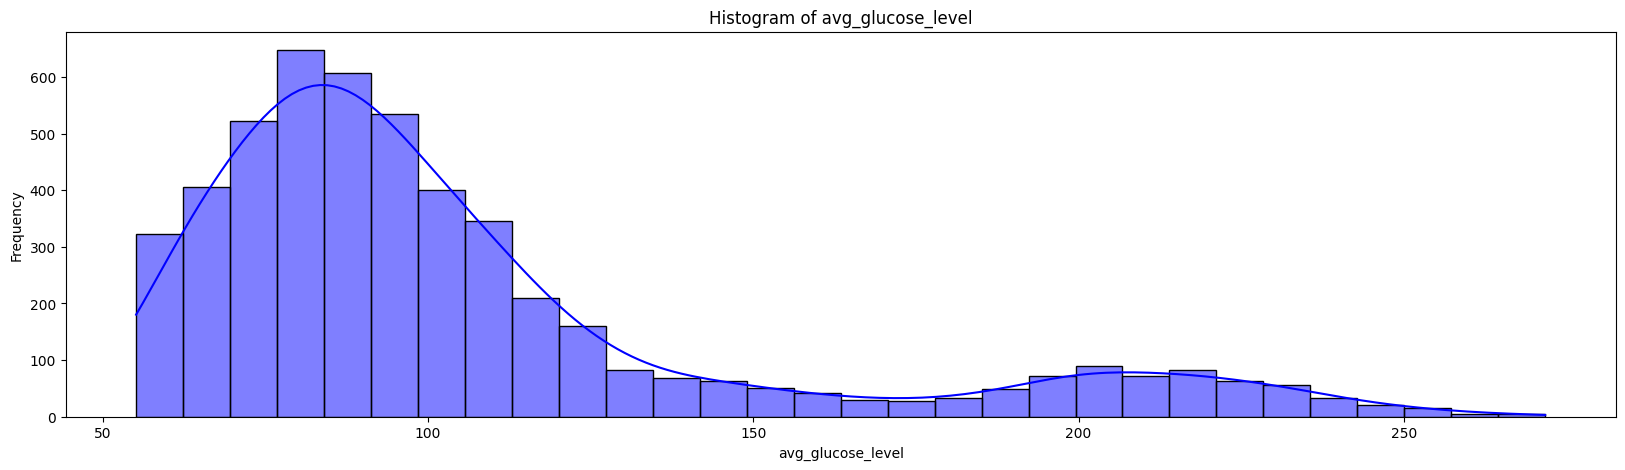

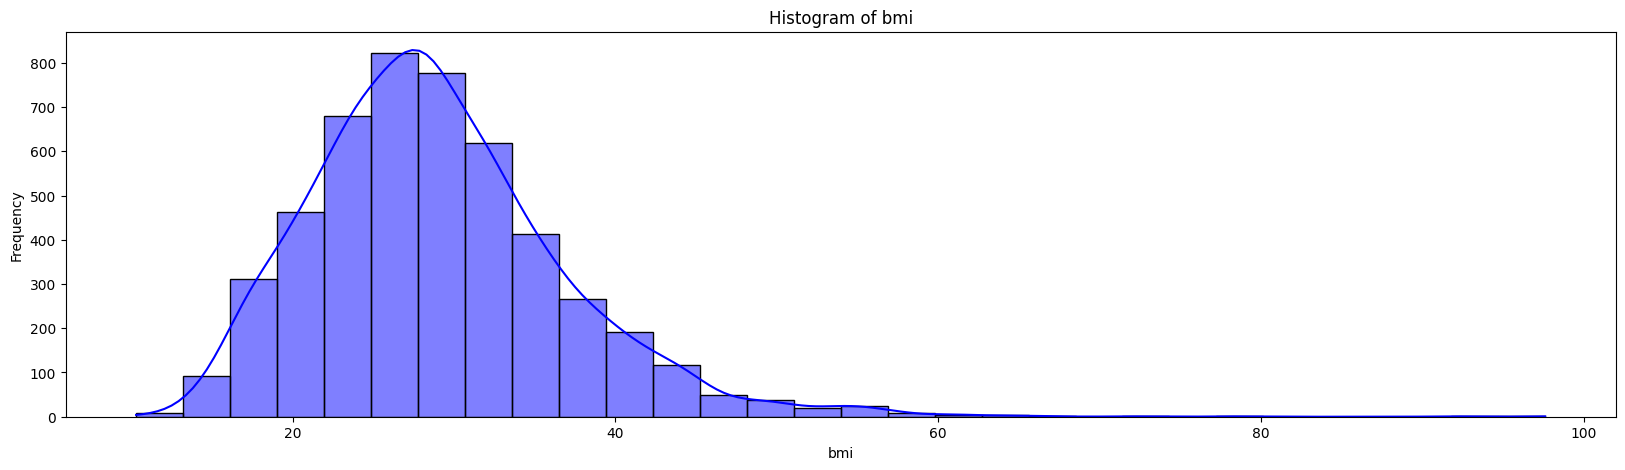

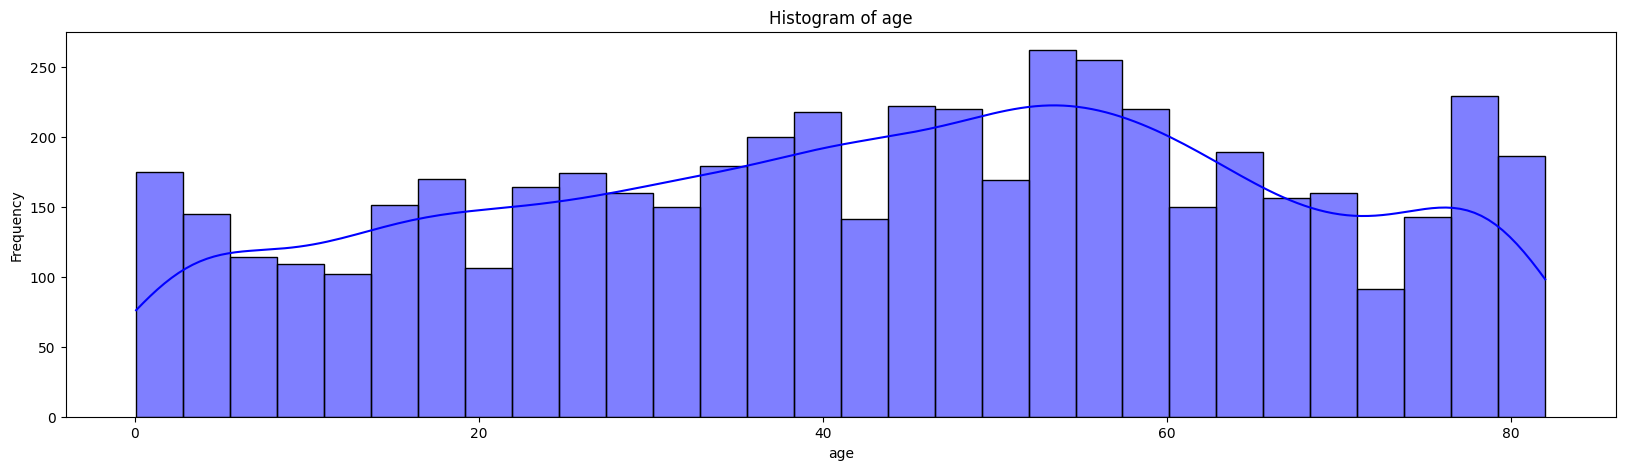

In [ ]:
 # to studty the normal dis
for i in numerical_df :
    plt.figure(figsize=(20, 5))

    # Create histogram
    sns.histplot(df[i], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')




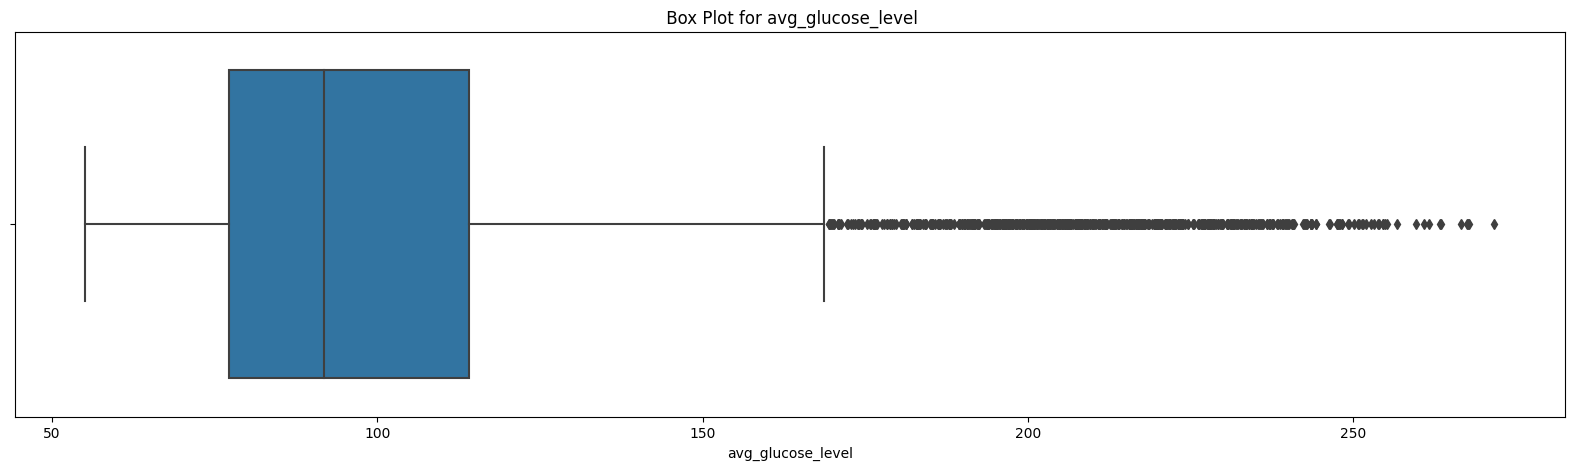

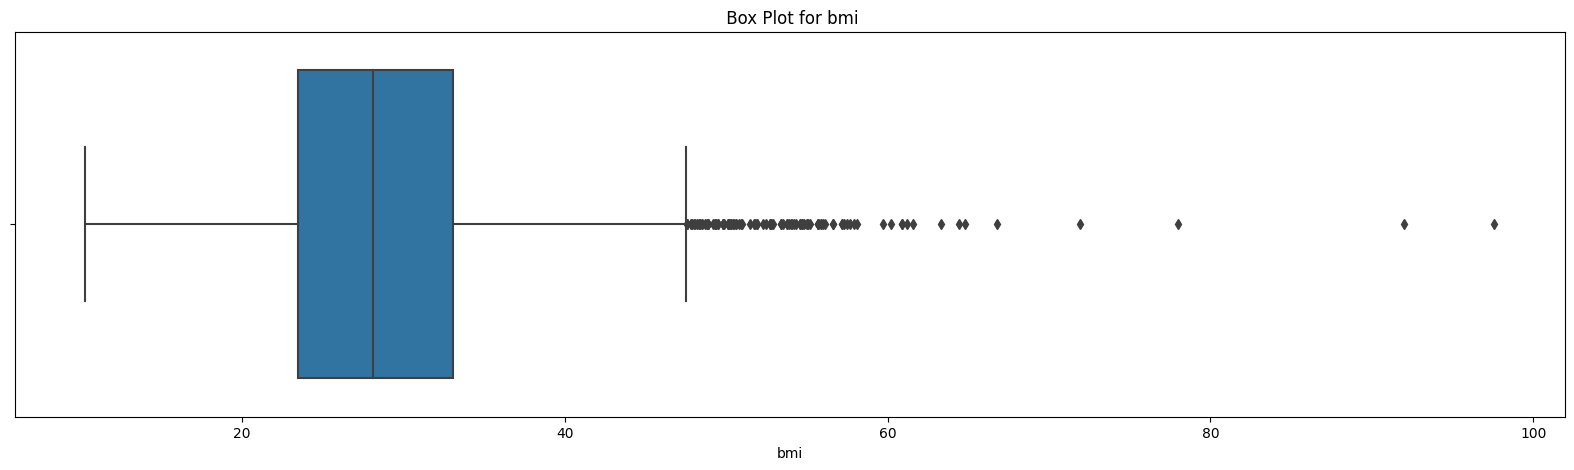

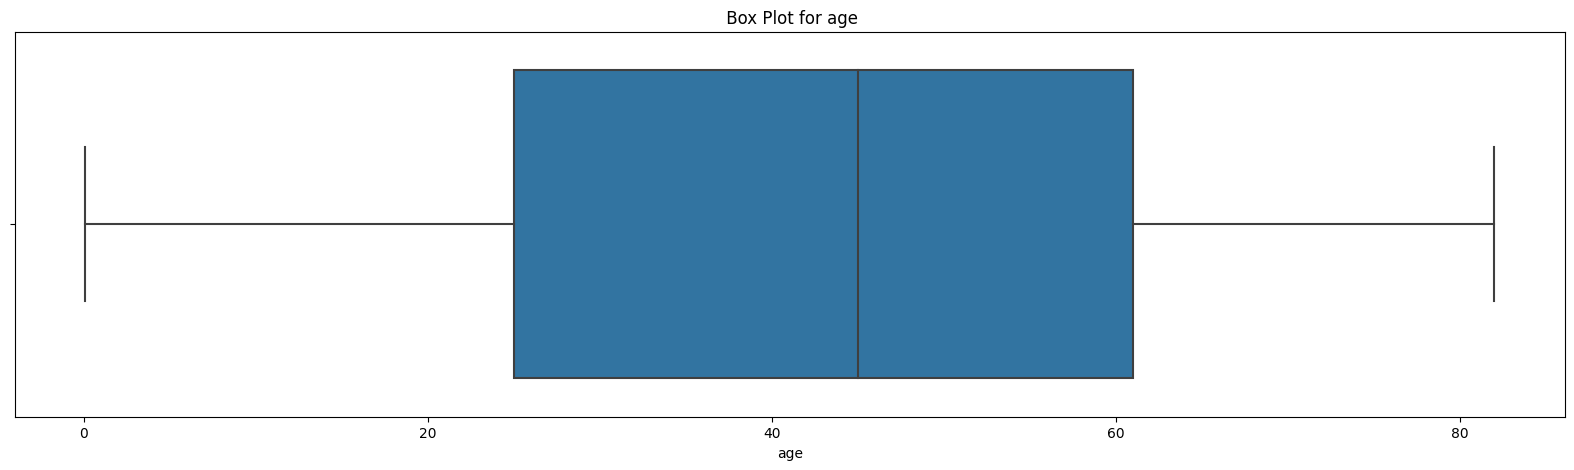

In [ ]:
# to find the outliers :
for i in numerical_df  :
  plt.figure(figsize=(20, 5))
  sns.boxplot(x=numerical_df[i])

  plt.title(f' Box Plot for {i}')
  plt.show()


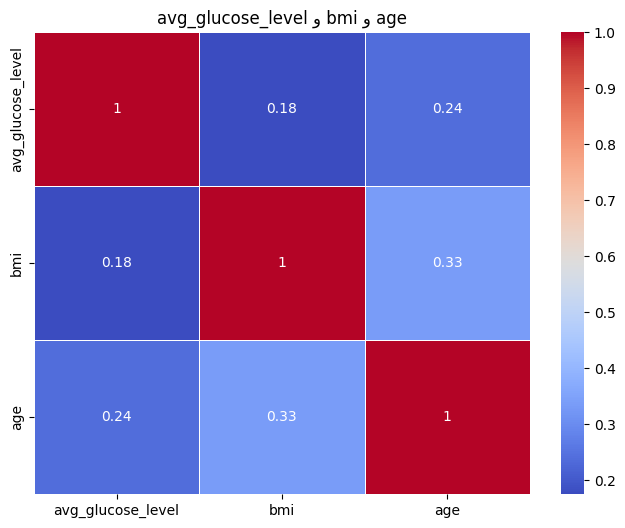

In [ ]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('avg_glucose_level و bmi و age')
plt.show()

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="avg_glucose_level", color="stroke",
                   barmode="overlay", nbins=30,
                   labels={'age': 'age', 'count': 'Number of Passengers'},
                   title='stroke by avg_glucose_level')

# Save the plot to an HTML file
fig.write_html("Survival_by_Age.html")

# Show the plot
fig.show()

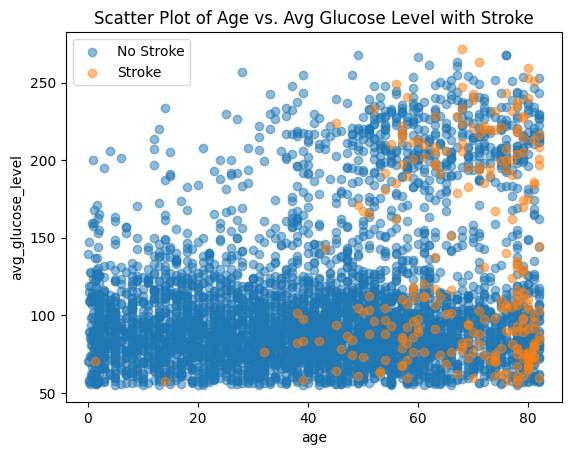

In [ ]:


import matplotlib.pyplot as plt


data_no_stroke = df[df['stroke'] == 0]

data_stroke = df[df['stroke'] == 1]


x_feature = 'age'
y_feature = 'avg_glucose_level'

# Create scatter plots for both 'stroke' classes
plt.scatter(data_no_stroke[x_feature], data_no_stroke[y_feature], label='No Stroke', alpha=0.5)
plt.scatter(data_stroke[x_feature], data_stroke[y_feature], label='Stroke', alpha=0.5)

# Add labels and a legend
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()

# Set a title for the plot
plt.title('Scatter Plot of Age vs. Avg Glucose Level with Stroke')

# Show the plot
plt.show()


<ipython-input-116-d71e9c2cbec7>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



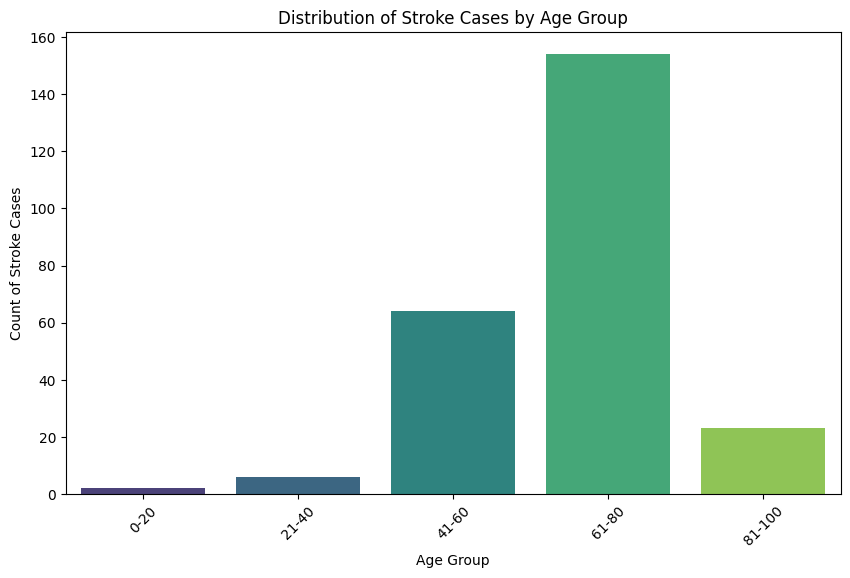

In [ ]:
# numrical with target     :
import seaborn as sns
import matplotlib.pyplot as plt


data_with_stroke = df[df['stroke'] == 1]

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']


data_with_stroke['age_group'] = pd.cut(data_with_stroke['age'], bins=age_bins, labels=age_labels)
# cut for convert from a continuous variable to a categorical variable.

plt.figure(figsize=(10, 6))
sns.countplot(data=data_with_stroke, x='age_group', palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count of Stroke Cases')
plt.title('Distribution of Stroke Cases by Age Group')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# insights from numrical data :
# skewed on the right ( 	avg_glucose_level)
# normal distribution on ( bmi )
# we have a equal data for  all ages

################################
# outlier on bmi +  avg_glucose_level   features
# boor coorealtion between features with each other
# the ages between a 61 - 81 they are most susceptible to stroke and have high of  avg_glucose_level
# most of the people have overwight also They suffer from a stroke



In [ ]:
numerical_df.head()

,avg_glucose_level,bmi,age
0,228.69,36.6,67.0
1,202.21,NaN,61.0
2,105.92,32.5,80.0
3,171.23,34.4,49.0
4,174.12,24.0,79.0


<ipython-input-119-65d3c641f58f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



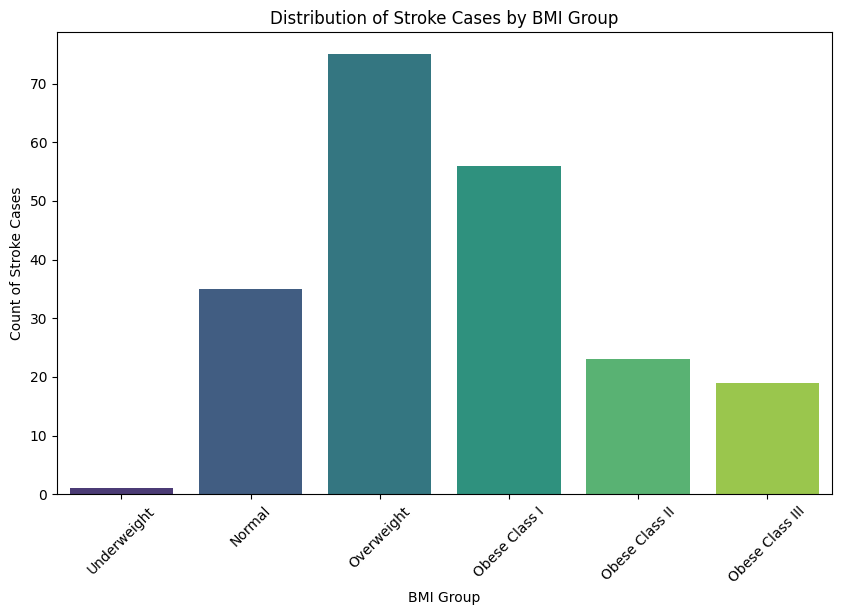

In [ ]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

data_with_stroke['bmi_group'] = pd.cut(data_with_stroke['bmi'], bins=bmi_bins, labels=bmi_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=data_with_stroke, x='bmi_group', palette='viridis')
plt.xlabel('BMI Group')
plt.ylabel('Count of Stroke Cases')
plt.title('Distribution of Stroke Cases by BMI Group')
plt.xticks(rotation=45)
plt.show()


<ipython-input-120-274fe1b17d32>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



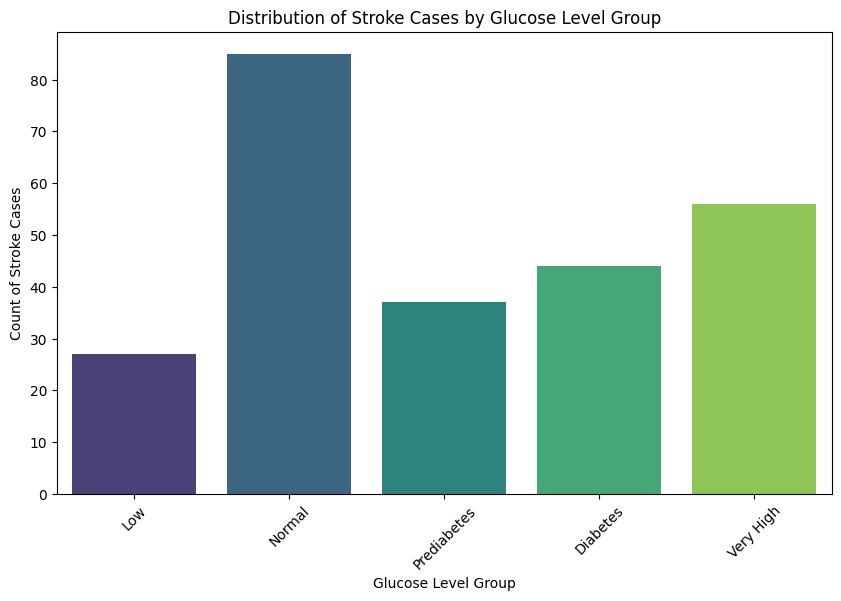

In [ ]:
# Define glucose level bins and labels


data_with_stroke = df[df['stroke'] == 1]
glucose_bins = [0, 70, 100, 125, 200, float('inf')]
glucose_labels = ['Low', 'Normal', 'Prediabetes', 'Diabetes', 'Very High']

data_with_stroke['glucose_level_group'] = pd.cut(data_with_stroke['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=data_with_stroke, x='glucose_level_group', palette='viridis')
plt.xlabel('Glucose Level Group')
plt.ylabel('Count of Stroke Cases')
plt.title('Distribution of Stroke Cases by Glucose Level Group')
plt.xticks(rotation=45)
plt.show()







In [ ]:
# study with categorical
text_df.columns


Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

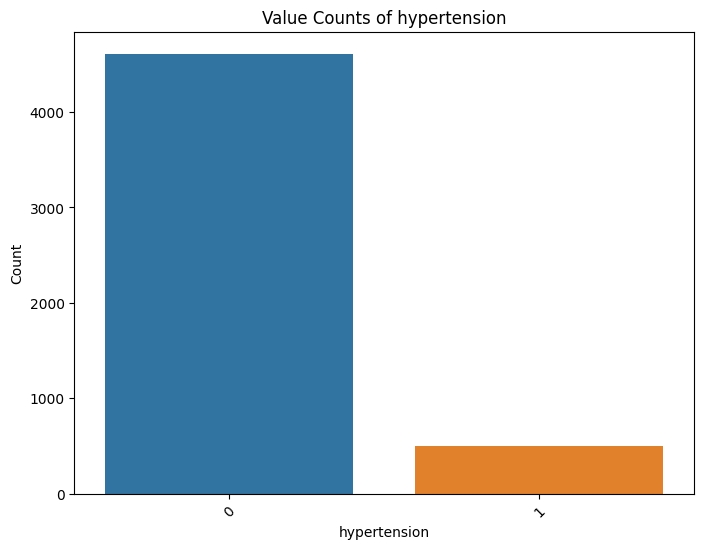

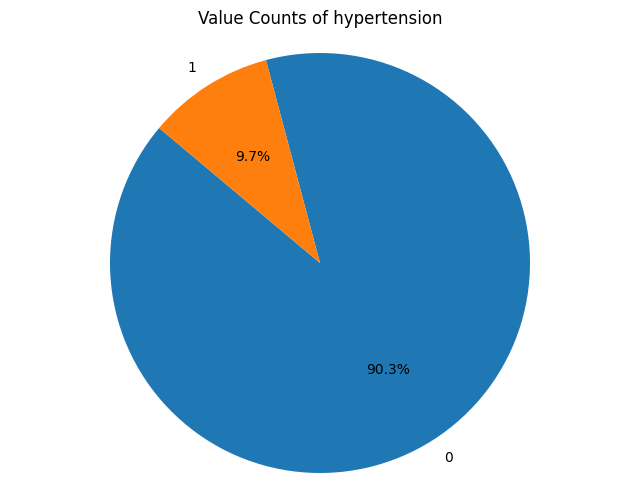

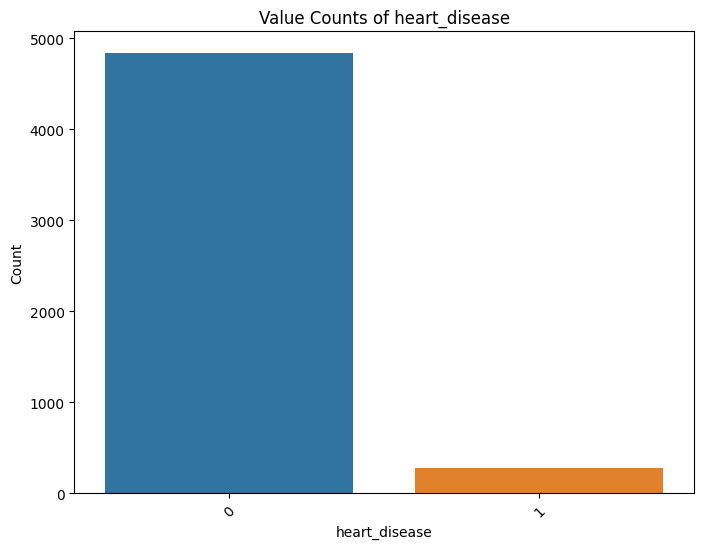

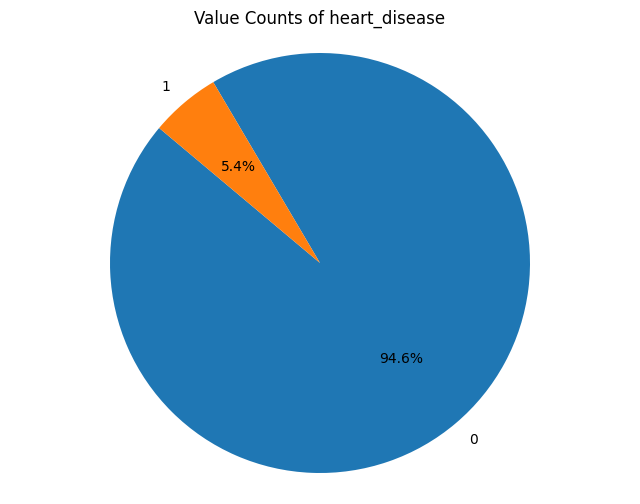

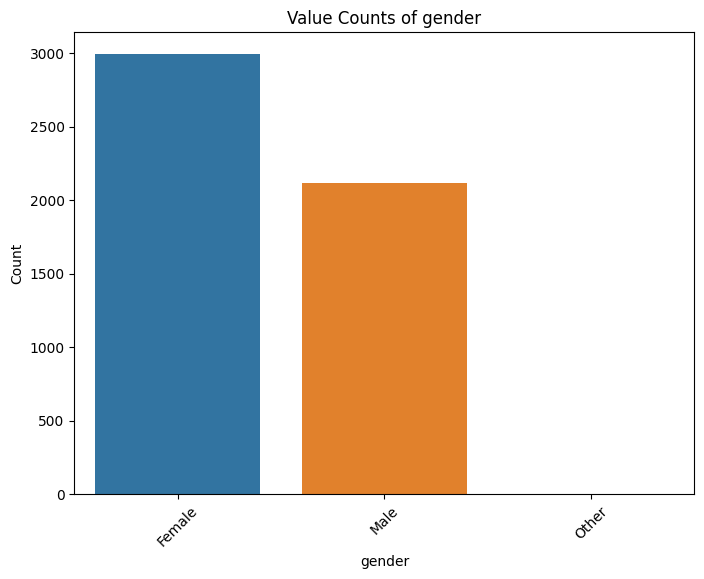

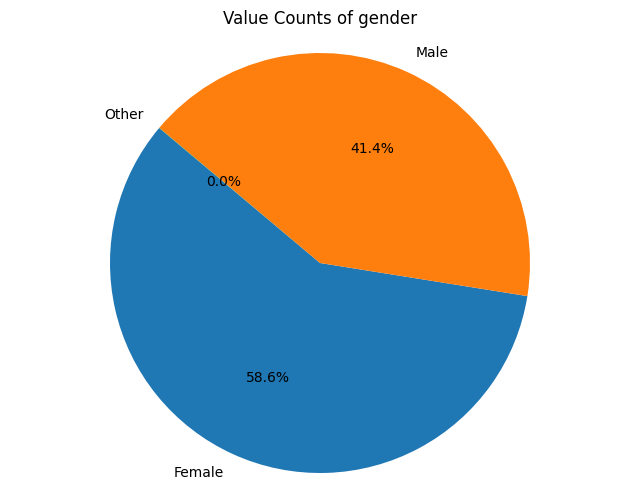

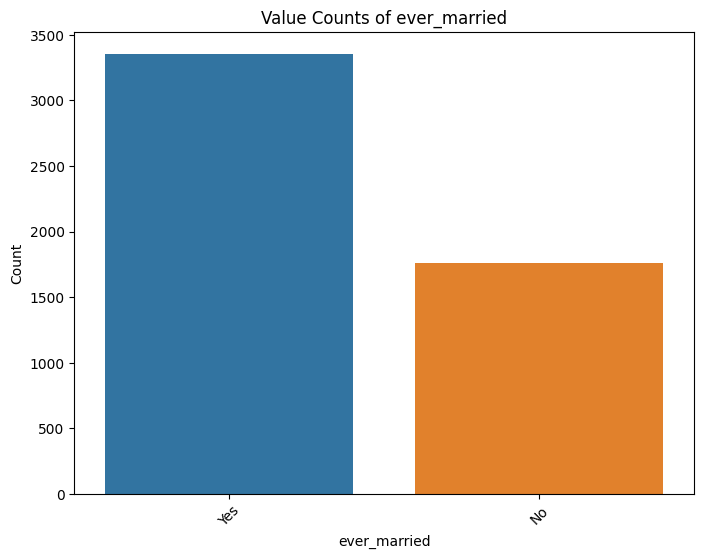

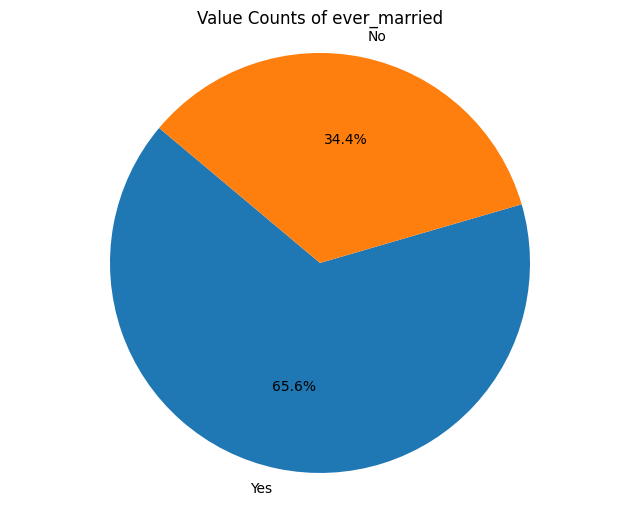

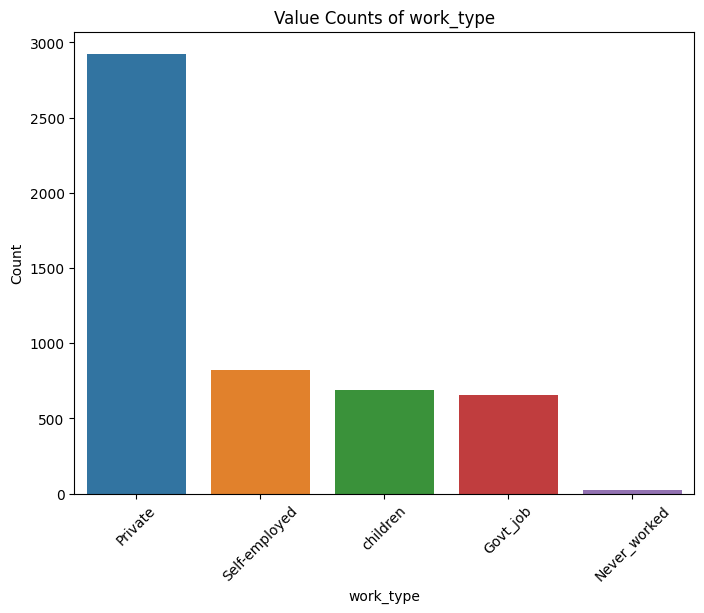

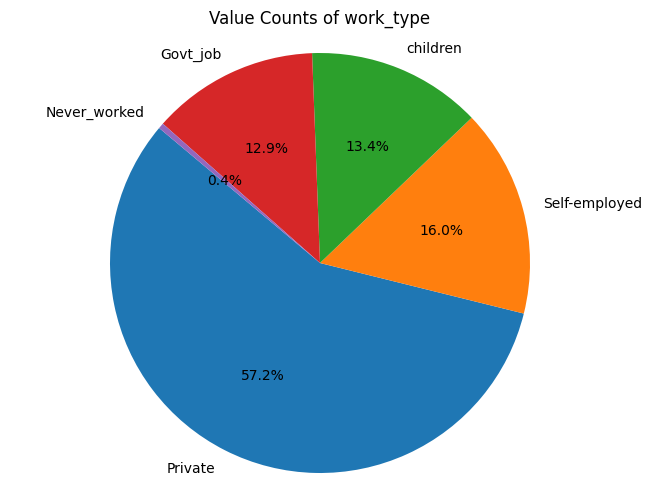

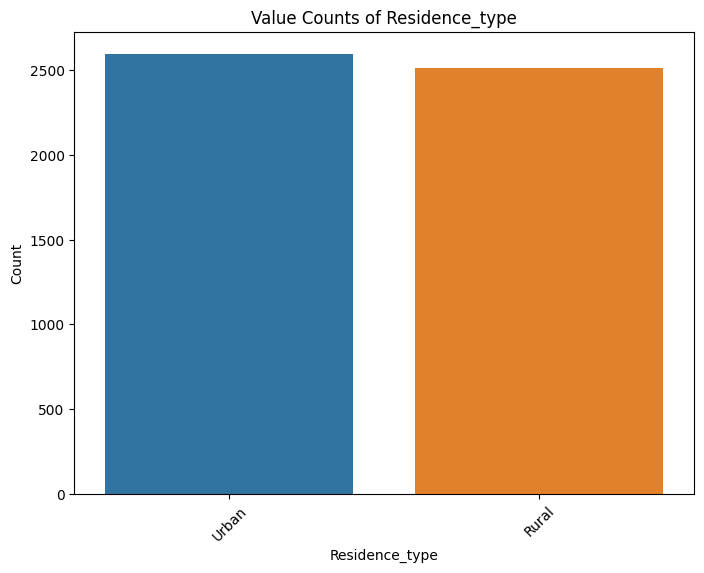

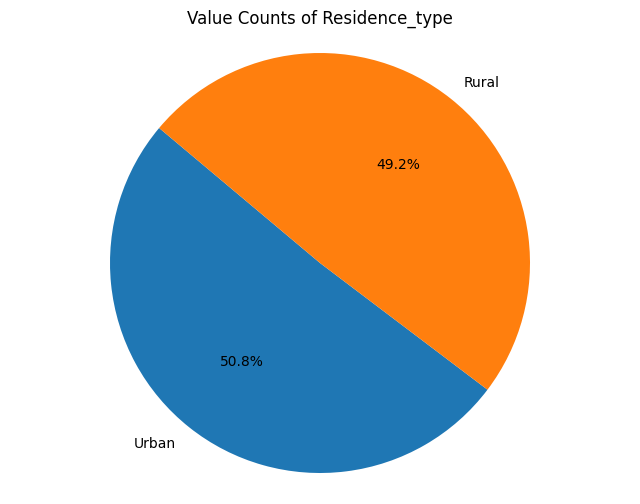

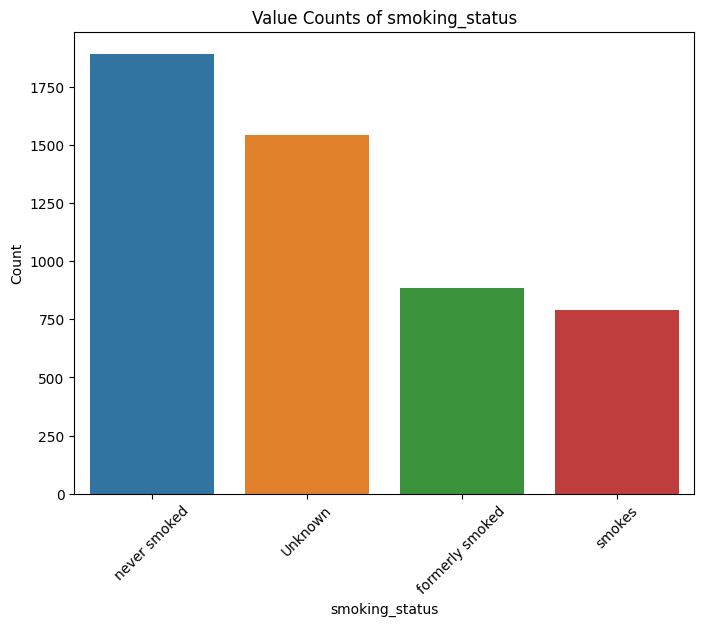

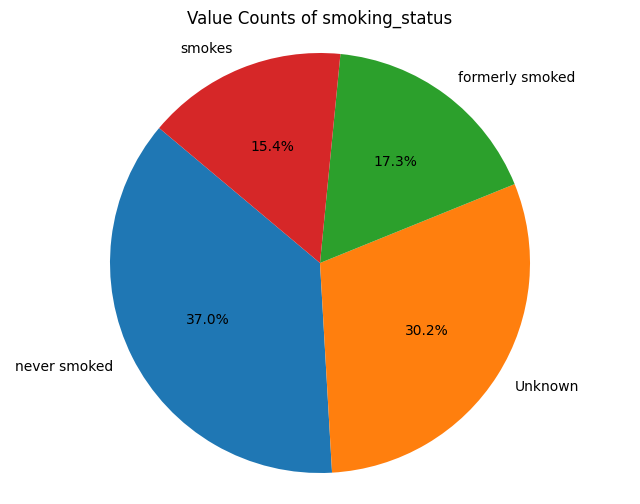

In [ ]:
categorical_columns = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column
for column in categorical_columns:
    # Count unique values and their counts
    value_counts = text_df[column].value_counts()
    value_counts

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Value Counts of {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Value Counts of {column}')
    plt.show()

In [ ]:
# List of categorical columns
categorical_columns = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column
for column in categorical_columns:
    # Count unique values and their counts
    value_counts = text_df[column].value_counts()

    # Print unique values and their counts using a list comprehension
    print(f"Column: {column}")
    [print(f"Value: {value}, Count: {count}") for value, count in value_counts.items()]
    print("\n")

Column: hypertension
Value: 0, Count: 4612
Value: 1, Count: 498


Column: heart_disease
Value: 0, Count: 4834
Value: 1, Count: 276


Column: gender
Value: Female, Count: 2994
Value: Male, Count: 2115
Value: Other, Count: 1


Column: ever_married
Value: Yes, Count: 3353
Value: No, Count: 1757


Column: work_type
Value: Private, Count: 2925
Value: Self-employed, Count: 819
Value: children, Count: 687
Value: Govt_job, Count: 657
Value: Never_worked, Count: 22


Column: Residence_type
Value: Urban, Count: 2596
Value: Rural, Count: 2514


Column: smoking_status
Value: never smoked, Count: 1892
Value: Unknown, Count: 1544
Value: formerly smoked, Count: 885
Value: smokes, Count: 789




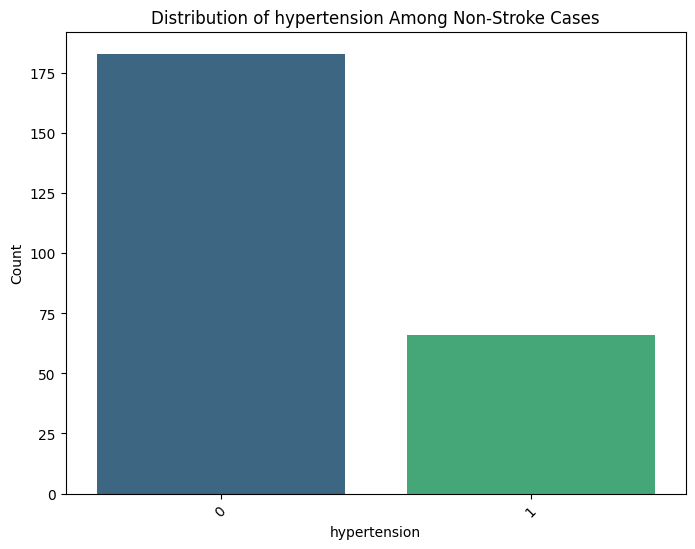

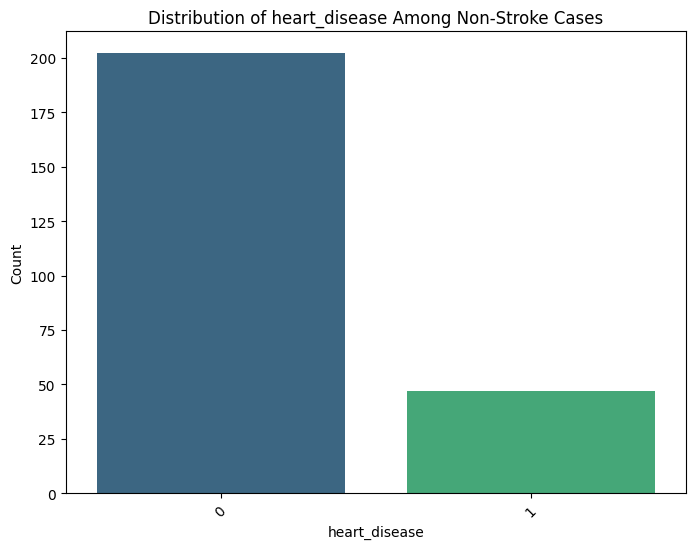

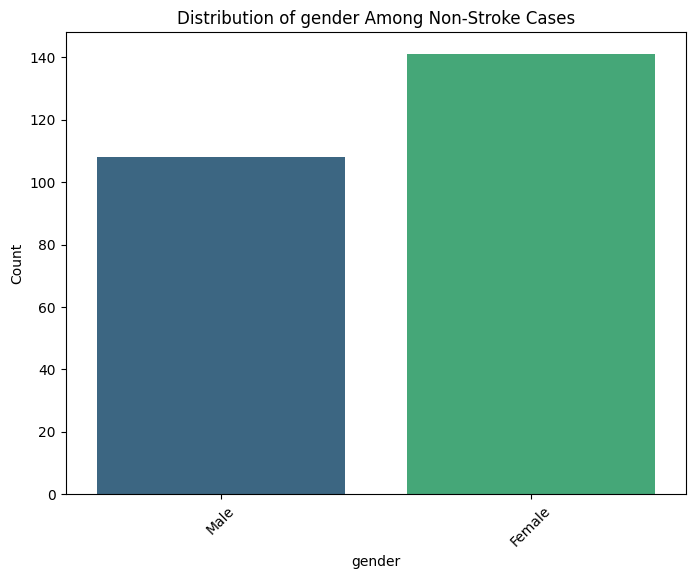

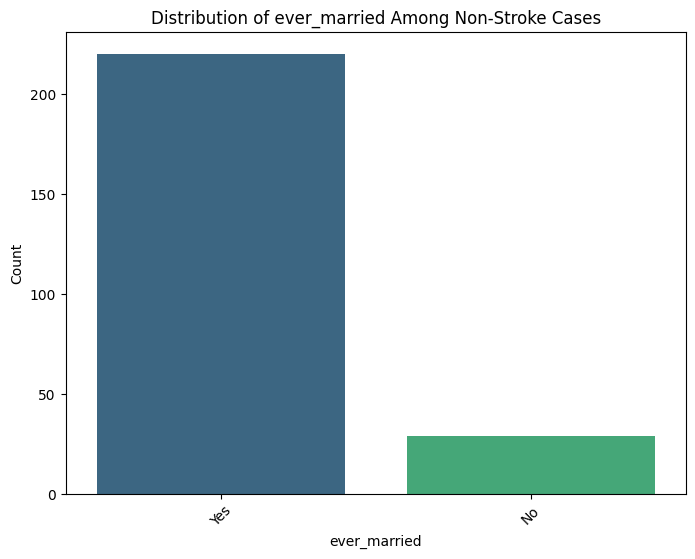

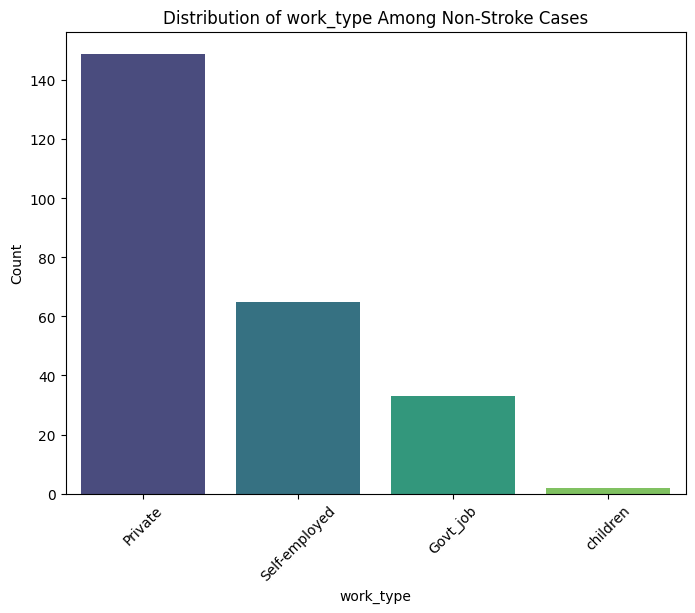

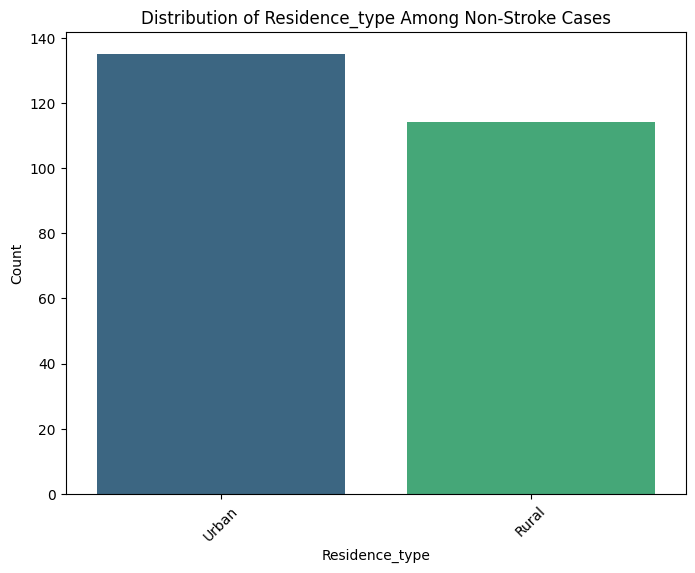

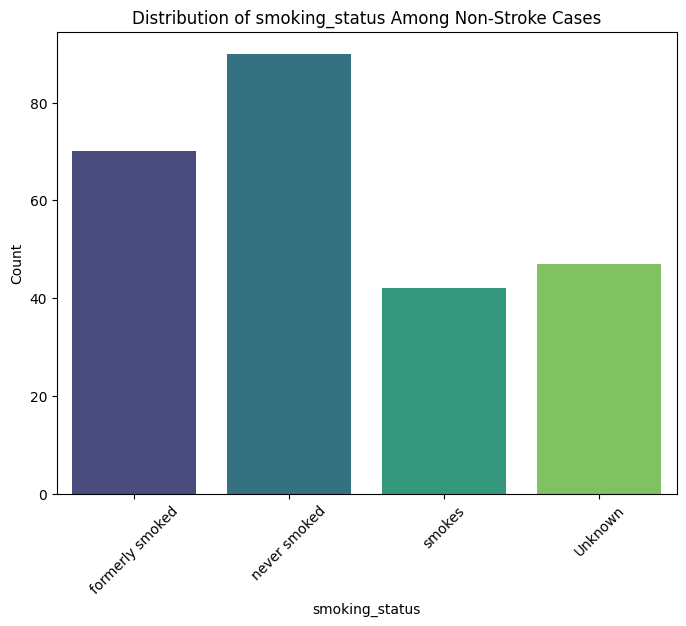

In [ ]:
categorical_columns = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Filter the DataFrame for non-stroke cases
non_stroke_df = df[df['stroke'] == 1]

# Loop through each categorical column
for column in categorical_columns:
    # Create a countplot for the categorical column among non-stroke cases
    plt.figure(figsize=(8, 6))
    sns.countplot(data=non_stroke_df, x=column, palette='viridis')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} Among Non-Stroke Cases')
    plt.xticks(rotation=45)
    plt.show()

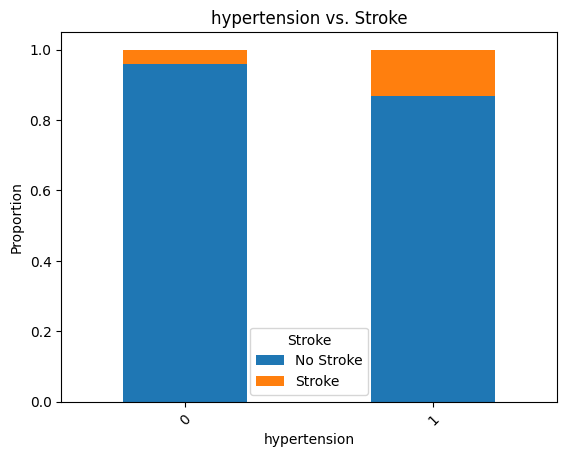

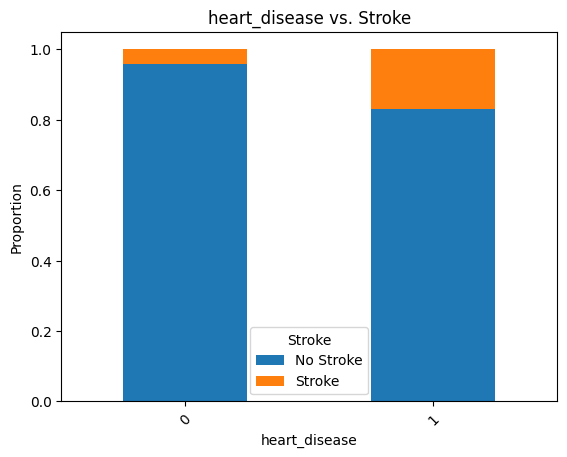

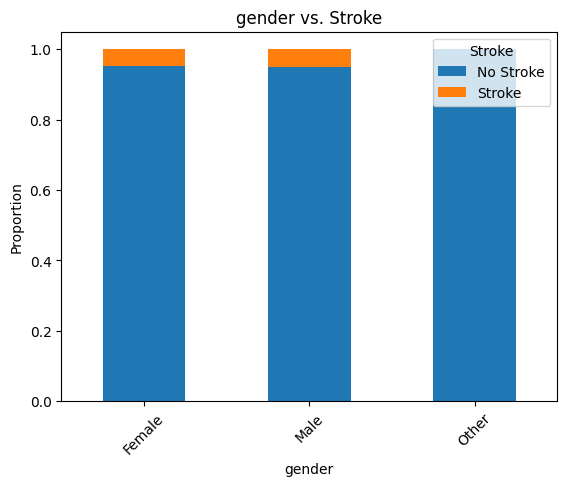

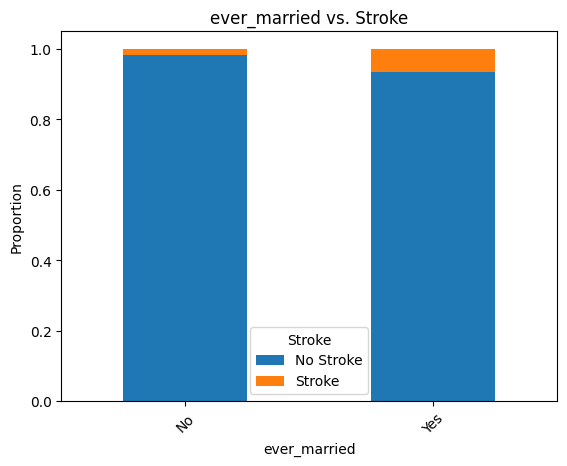

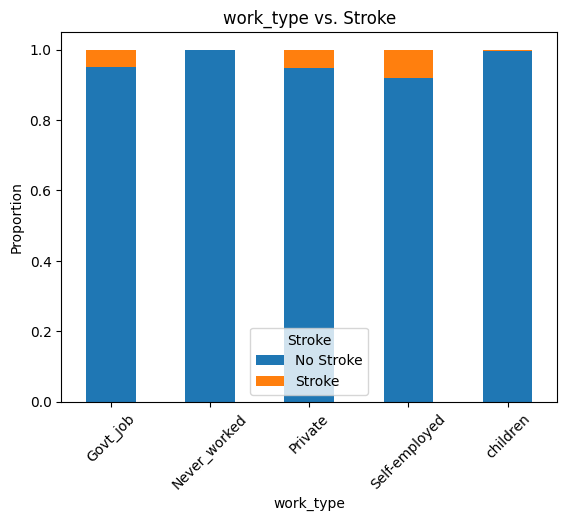

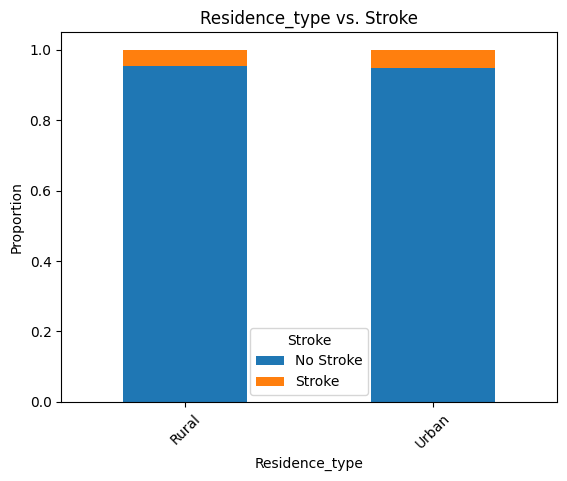

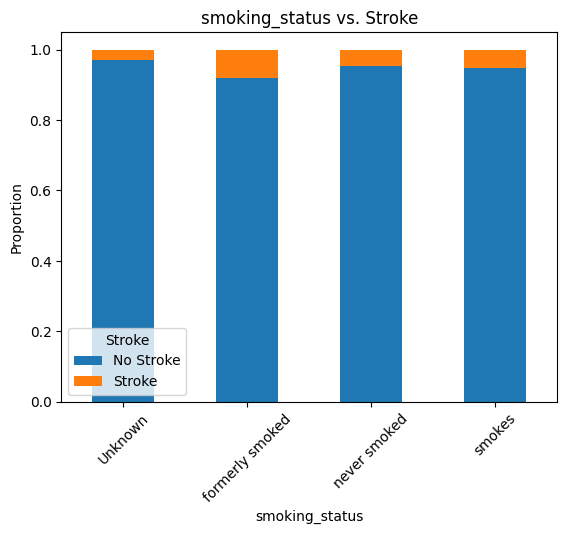

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:

    crosstab = pd.crosstab(df[column], df['stroke'])


    crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0)
    crosstab_percentage.plot(kind='bar', stacked=True)

    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.title(f'{column} vs. Stroke')
    plt.xticks(rotation=45)
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

    plt.show()


In [ ]:
# relation between the smoking and stroke
non_stroke_smokers = df[(df['stroke'] == 1) & (df['smoking_status'] == 'smokes')]


count_stroke_smokers = len(non_stroke_smokers)

print(f"A person smokes and is infected:){count_non_stroke_smokers}")


A person smokes and is infected:)66


In [ ]:
# relation between the  non smoking and stroke
non_stroke_smokers = df[(df['stroke'] == 0) & (df['smoking_status'] == 'never smoked')]


count_non_stroke_smokers = len(non_stroke_smokers)

print(f"A person  never smoked and is infected:) {count_non_stroke_smokers}")


A person  never smoked and is infected:) 1802


In [ ]:
non_stroke_smokers = df[(df['stroke'] == 1 ) & (df['hypertension'] == 1 )]


count_non_stroke_smokers = len(non_stroke_smokers)

print(f"A person   has hypertension  and is infected:) {count_non_stroke_smokers}")


A person   has hypertension  and is infected:) 66


In [ ]:
#the final insights :
## missing value on bmi
#There no duplicated values
#Features You can drop: id
#------------------------------------
# numrical features :
# skewed on the right ( 	avg_glucose_level)
# normal distribution on ( bmi )
# we have a equal data for  all ages


# boor coorealtion between features with each other
# the ages between a 61 - 81 they are most susceptible to stroke and have high of  avg_glucose_level
# most of the people have overwight also They suffer from a stroke

# avg_glucose_level feature : there outliers more than 250
# bmi feature : there outliers more than 80

#-------------------------------------------------------
# categorical feature :

# hypertension' and 'heart_disease  biased for 0
# ever_married  biased for NO




In [ ]:
#  supervised >>> classification >>> confusion metrics

In [ ]:
df['bmi'].describe

<bound method NDFrame.describe of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [ ]:
#preprocessing
#NULL VALUE ON BMI :

df["bmi"].isnull().sum()

# 201 of 5110 is null


201

In [ ]:
#drop the id


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# split before any data preprocess ( fill the null value in bmi )

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

######################################
mean_bmi_stroke_1 = train_df.loc[train_df['stroke'] == 1, 'bmi'].mean()
mean_bmi_stroke_0 = train_df.loc[train_df['stroke'] == 0, 'bmi'].mean()


#Fill the null values in 'bmi' based on the 'stroke' column

train_df.loc[(train_df['stroke'] == 1) & (train_df['bmi'].isna()), 'bmi'] = mean_bmi_stroke_1
train_df.loc[(train_df['stroke'] == 0) & (train_df['bmi'].isna()), 'bmi'] = mean_bmi_stroke_0

# Fill the null values in 'bmi' for the test dataset based on the 'stroke' column
test_df.loc[(test_df['stroke'] == 1) & (test_df['bmi'].isna()), 'bmi'] = mean_bmi_stroke_1
test_df.loc[(test_df['stroke'] == 0) & (test_df['bmi'].isna()), 'bmi'] = mean_bmi_stroke_0


In [ ]:
train_df['bmi'].isnull().sum()

0

In [ ]:
# dealing with categorical data

df.select_dtypes(include=  object)
# male > 0
# female > 1
#---------------------
#yes > 1
# no > 0     label encoding
#----------
#Private
#Self-employed
#children           nominal one hot
#Govt_job
#Never_worked

#-------------------
#Urban
#Rura               label

#----------------------------

#never smoked          ordinal
#Unknown                label
#formerly smoked
#smokes

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
#label encoding
from sklearn.preprocessing import OneHotEncoder


onehot_cols = ['gender','ever_married', 'Residence_type','work_type']
train_df_onehot = pd.get_dummies(train_df, columns=onehot_cols)
test_df_onehot  =pd.get_dummies(train_df, columns=onehot_cols)

In [ ]:
train_df_onehot

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
802,4970,79.00,0,0,112.64,28.5,formerly smoked,0,0,1,0,1,1,0,0,0,0,1,0
3927,56137,62.00,0,0,88.32,36.3,Unknown,0,1,0,0,1,0,1,0,0,1,0,0
2337,54590,21.00,0,0,59.52,33.7,never smoked,0,1,0,1,0,1,0,0,0,1,0,0
3910,36548,31.00,0,0,65.70,30.4,formerly smoked,0,0,1,0,1,0,1,1,0,0,0,0
1886,61171,31.00,0,0,59.63,19.9,never smoked,0,1,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,never smoked,0,0,1,0,1,1,0,1,0,0,0,0
466,1307,61.00,1,0,170.05,60.2,smokes,0,1,0,0,1,1,0,0,0,1,0,0
3092,31481,1.16,0,0,97.28,17.8,Unknown,0,1,0,1,0,0,1,0,0,0,0,1
3772,61827,80.00,0,0,196.08,31.0,formerly smoked,0,0,1,0,1,1,0,0,0,0,1,0


In [ ]:
  # Define the ordinal mapping for smoking_status
smoking_status_mapping = {
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3  # If you want to assign an ordinal value to 'Unknown'
}

# Apply ordinal encoding to the 'smoking_status' column
train_df_onehot['smoking_status'] = train_df_onehot['smoking_status'].map(smoking_status_mapping)
test_df_onehot['smoking_status'] = test_df_onehot['smoking_status'].map(smoking_status_mapping)

In [ ]:
train_df_onehot

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
802,4970,79.00,0,0,112.64,28.5,1,0,0,1,0,1,1,0,0,0,0,1,0
3927,56137,62.00,0,0,88.32,36.3,3,0,1,0,0,1,0,1,0,0,1,0,0
2337,54590,21.00,0,0,59.52,33.7,0,0,1,0,1,0,1,0,0,0,1,0,0
3910,36548,31.00,0,0,65.70,30.4,1,0,0,1,0,1,0,1,1,0,0,0,0
1886,61171,31.00,0,0,59.63,19.9,0,0,1,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0,0,0,1,0,1,1,0,1,0,0,0,0
466,1307,61.00,1,0,170.05,60.2,2,0,1,0,0,1,1,0,0,0,1,0,0
3092,31481,1.16,0,0,97.28,17.8,3,0,1,0,1,0,0,1,0,0,0,0,1
3772,61827,80.00,0,0,196.08,31.0,1,0,0,1,0,1,1,0,0,0,0,1,0


In [ ]:
#  min max scaler  for bmi  , avg_glucose_level ( have a outlier )
# Assuming you have defined train_df_onehot earlier in your code
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
scale_cols = ['avg_glucose_level', 'bmi']


scaler.fit(train_df_onehot[scale_cols])

train_df_onehot[scale_cols] = scaler.transform(train_df_onehot[scale_cols])
test_df_onehot[scale_cols] = scaler.transform(test_df_onehot[scale_cols])


In [ ]:
train_df_onehot.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,36377.521282,43.304149,0.093933,0.052838,0.236976,0.213772,1.390166,0.045744,0.587329,0.412671,0.345157,0.654843,0.488503,0.511497,0.131605,0.004892,0.570939,0.160714,0.131849
std,21085.050303,22.535815,0.291772,0.223736,0.210644,0.088886,1.256516,0.208954,0.492375,0.492375,0.475477,0.475477,0.499929,0.499929,0.338102,0.069783,0.495003,0.367312,0.338368
min,77.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17656.750000,25.000000,0.000000,0.000000,0.101883,0.154639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36822.500000,45.000000,0.000000,0.000000,0.169767,0.207331,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,54372.000000,61.000000,0.000000,0.000000,0.275090,0.257732,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# apply the Standardization scaler  on age features
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Column to scale
scale_col = 'age'


scaler.fit(train_df_onehot[scale_cols])

train_df_onehot[scale_cols] = scaler.transform(train_df_onehot[scale_cols])
test_df_onehot[scale_cols] = scaler.transform(test_df_onehot[scale_cols])


In [ ]:
x_train = train_df_onehot.drop('stroke', axis = 1 )
y_train =train_df_onehot["stroke"]

x_test = test_df_onehot.drop('stroke', axis = 1 )
y_test =test_df_onehot["stroke"]

In [ ]:
y_train.value_counts()


0    3901
1     187
Name: stroke, dtype: int64

In [ ]:
# Build model for classification :
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix



logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()




In [ ]:
logistic_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
naive_bayes_model.fit(x_train, y_train)



GaussianNB()

In [ ]:
y_pred_logistic = logistic_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)
y_pred_decision_tree = decision_tree_model.predict(x_test)
y_pred_knn = knn_model.predict(x_test)
y_pred_naive_bayes = naive_bayes_model.predict(x_test)


In [ ]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)
print("\nConfusion Matrix for Support Vector Classifier:")
print(confusion_matrix_svc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_decision_tree)
print("\nConfusion Matrix for KNN Classifier:")
print(confusion_matrix_knn)
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix_naive_bayes)


Confusion Matrix for Logistic Regression:
[[3892    9]
 [ 187    0]]

Confusion Matrix for Support Vector Classifier:
[[3901    0]
 [ 187    0]]

Confusion Matrix for Decision Tree Classifier:
[[3901    0]
 [   0  187]]

Confusion Matrix for KNN Classifier:
[[3899    2]
 [ 183    4]]

Confusion Matrix for Naive Bayes:
[[3797  104]
 [ 170   17]]
